### Assignment:

Build a logistic regression model using Scikit-learn to predict fraudulent transactions by training it on this kaggle dataset. Before you train the model, create at least 1 visualization of the data using the seaborn library of your choice. 

In [1]:
#imports +
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing

The next 3 cells define functions used for vizualization and learning

In [2]:
"""
Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
   Parmeters:
       X          a dataframe to normalize
       excluding  a list of field names to exclude from normalization 
"""
def normalize(X, excluding=None):
    if excluding is None:
        excluding = []

    # make a copy first, so that the caller has the option to keep the input seperate
    X2 = X.copy()
    for feature in X2.columns:
        if not feature in excluding:
            X2[feature] -= X2[feature].mean()
            X2[feature] /= X2[feature].std()
    return X2

In [3]:
"""Visualize the Credit Card Fraud data as Violin Plots
Parameters:
    df          a dataframe loaded with the Kaggle credit card fraud data
    per_frame   number of features to show per plot frame
    show_split  True for split violin; False for side by side (default)
    quick       True for a quick render of truncated data; False for full data (default)
"""
def vizualize(df, per_frame=None, show_split=None, quick=None):
# set up optional parameters (may be overkill, but it works)
    if show_split is None:
        show_split = False
    if per_frame is None:
        per_frame = 5
    if quick is None:
        quick = False

    _amount = "Amount" # I like to declare constants if I'm using a string more than once
    
    #set up the groups of features to display in each plot
    raw_numbered_features = ['V%d' % number for number in range(1, 29)]
    numbered_features = [raw_numbered_features[i:i + per_frame] for i in range(0, len(raw_numbered_features), per_frame)]
    
    #'Amount' is always by itself, since its scale is very different from the other features
    grouped_features = numbered_features + [[_amount]]
    
    
    #copy the data frame (so we don't mess with the callers data)
    df0 = df.copy()
    
    #if "quick" = True, then get a short sample of the data for faster processing
    if quick :
        df1 = df0.sort_values('Class')
        df0 = pd.concat([df1.head(100), df1.tail(100)])

    #now loop through the feature groups and generate violin plots for each feature group
    for feature_group in grouped_features:
        df_violin = df0.melt( value_vars = feature_group, id_vars='Class')     
        plt.rc('figure', figsize=(15,8))
        sns.violinplot(x='variable', y='value', hue='Class', data=df_violin, split=show_split)
        plt.show()
        

In [4]:
"""For the features listed in the dataframe passed, train a logistic regression model, and report on the success of the model
Parameters:
    features     A list of strings that are the names of the features to inlucde in the training
    df           a dataframe of features
"""
def define_train_predict( features, df):
   # The target variable which we would like to predict, is the 'Class' variable
    target = 'Class'

    print("Features used in this analysis:")
    print( features )                        #just making sure it's really using the features passed

    # Now create an X variable (containing the features) and an y variable (containing only the target variable)
    X = df[features]
    y = df[target] 
    
    # Define the model
    model = LogisticRegression(solver = 'lbfgs' )


    # Define the splitter for splitting the data in a train set and a test set
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

    
    for train_indices, test_indices in splitter.split(X, y):
        # Select the train and test data
        X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
        X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
        # Normalize the data
        X_train = normalize(X_train)
        X_test = normalize(X_test)
    
        # Fit and predict!
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
        # And finally: show the results
        print(classification_report(y_test, y_pred))

In [5]:
# Read the CSV file
df1 = pd.read_csv('creditcard.csv')

In [6]:

# Show the contents
display(df1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Visualization
Render the data as split and paired Violin Plots.  Interpretaion of the graphs appears after both sets of plots.

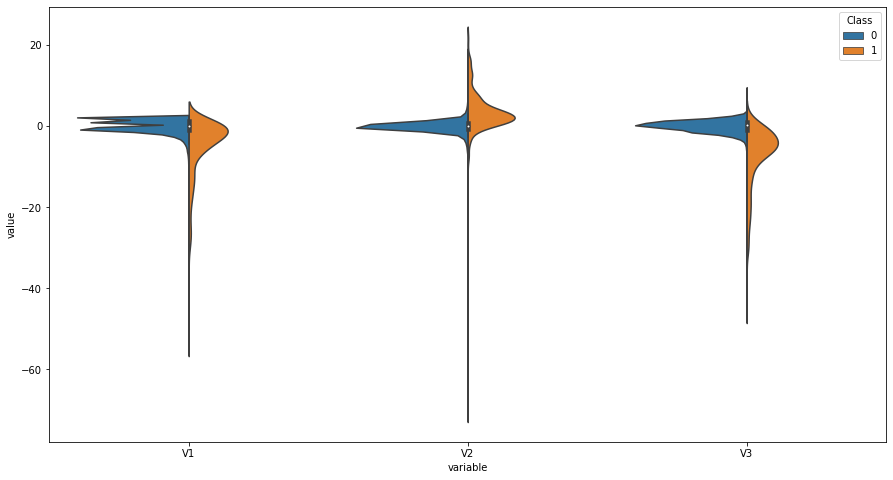

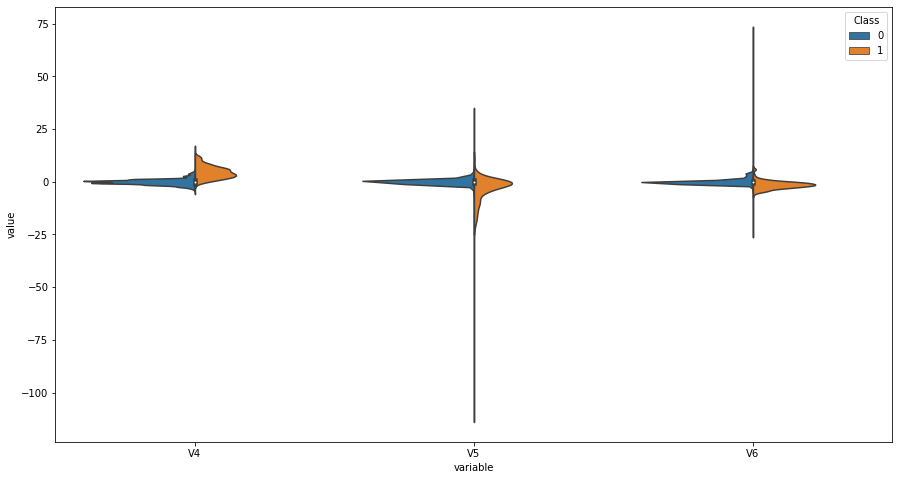

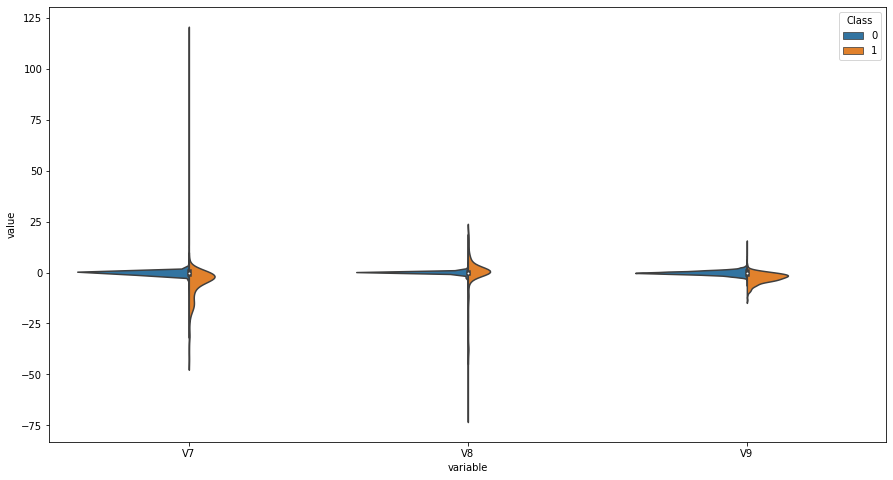

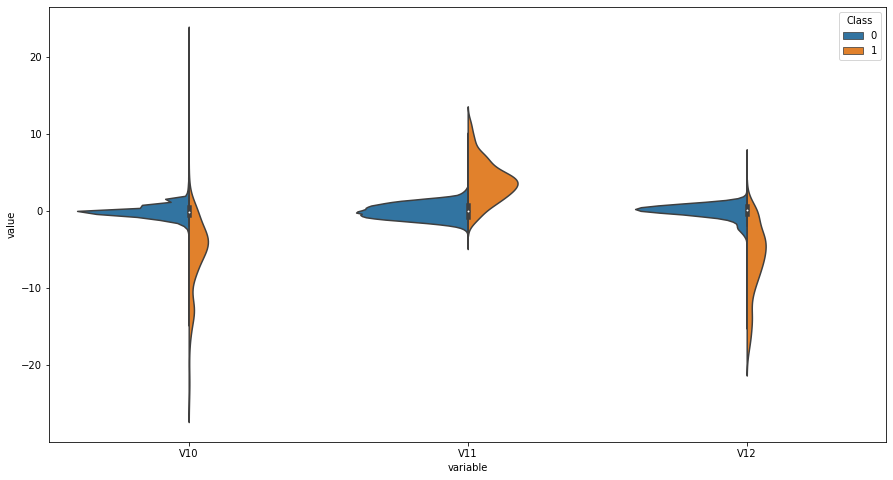

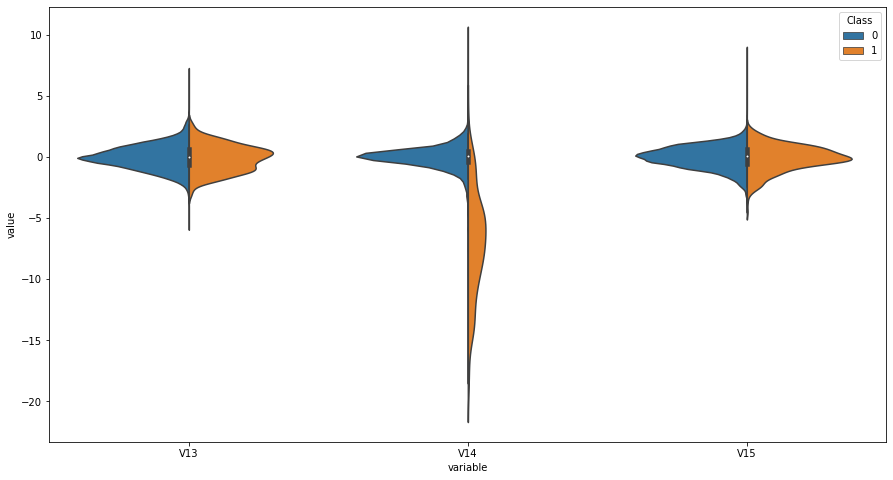

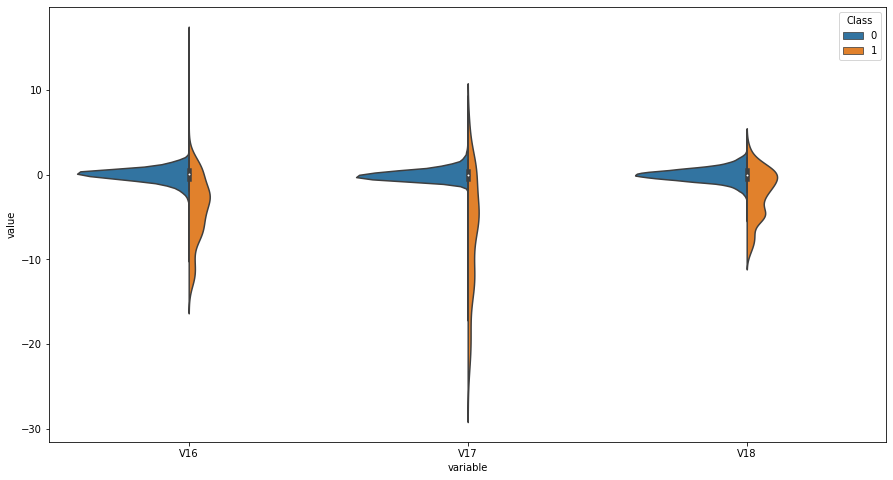

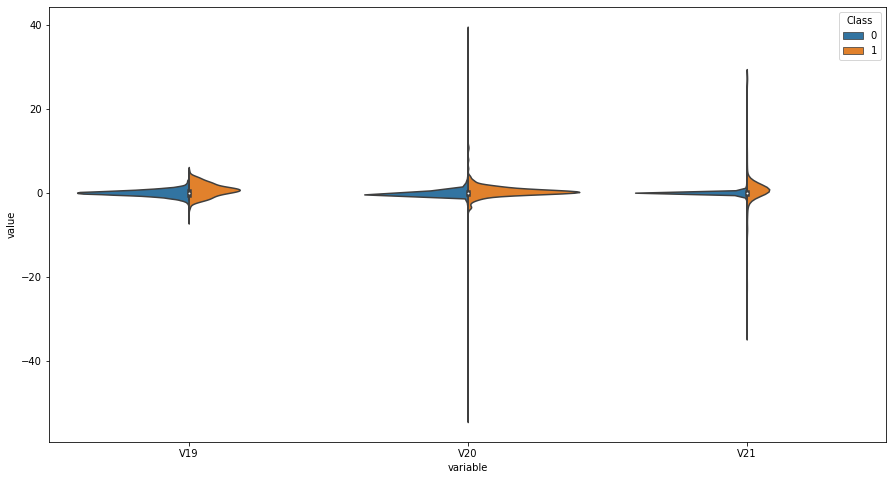

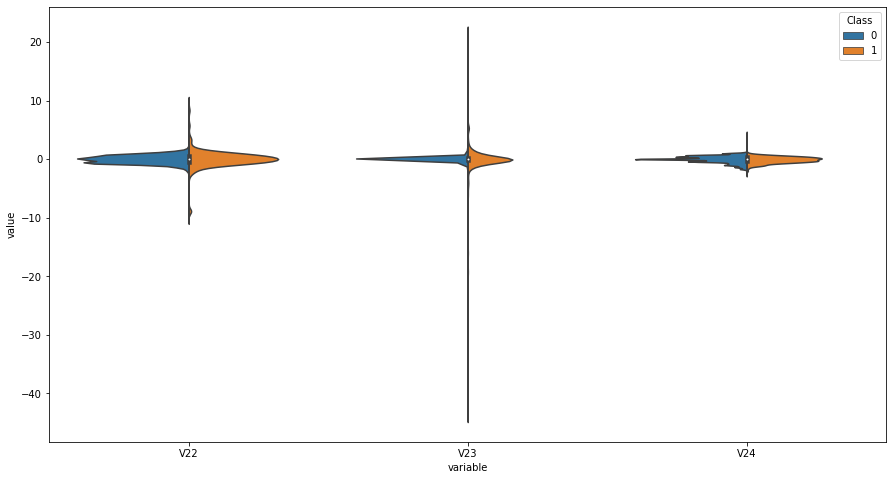

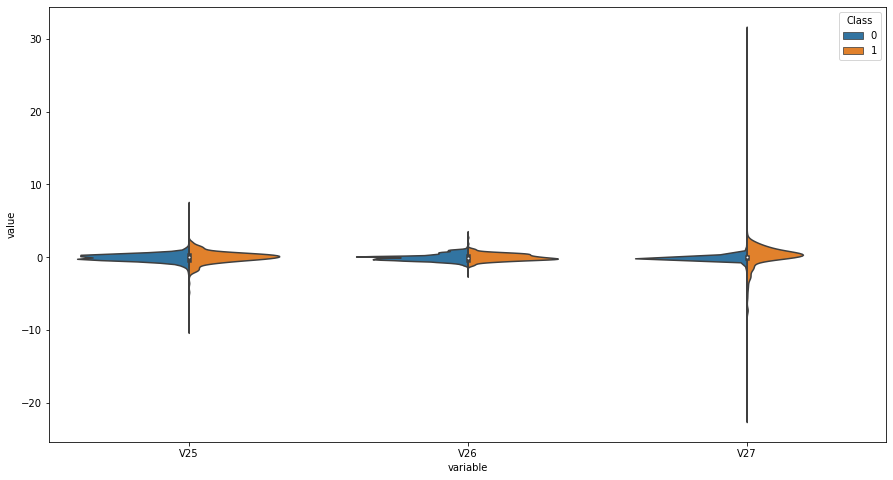

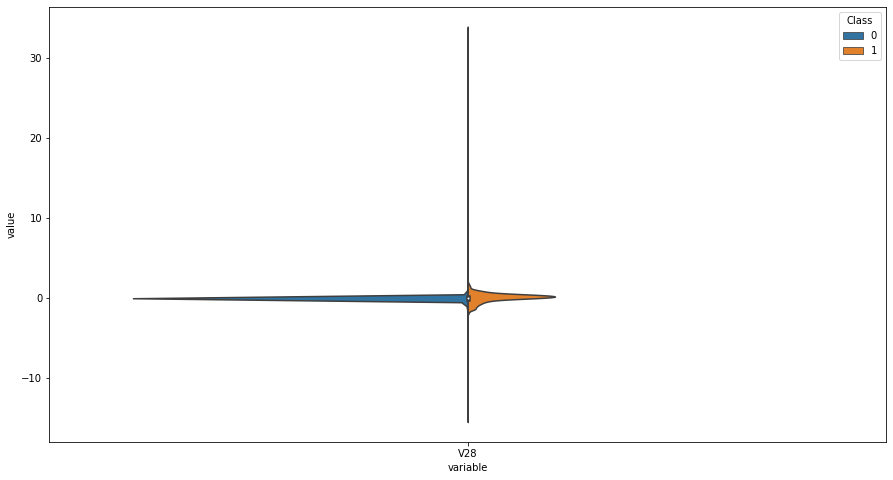

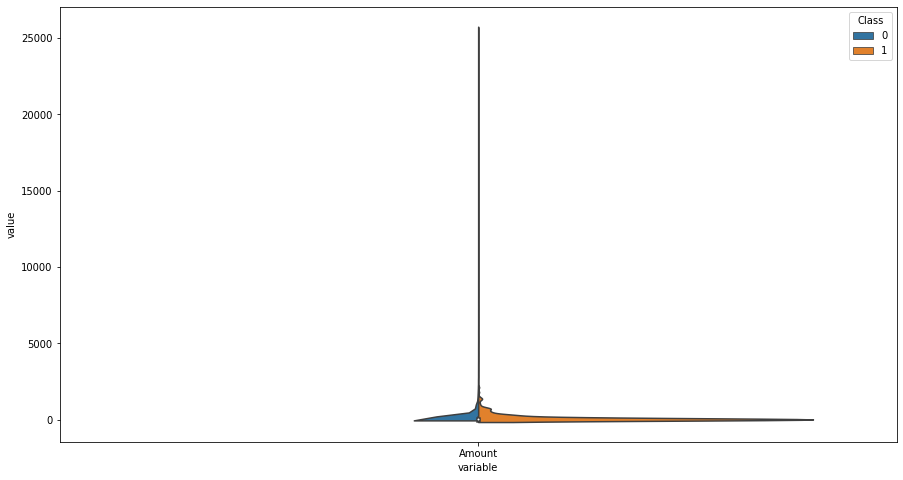

In [7]:
vizualize(df1, per_frame=3, show_split=True, quick=False)

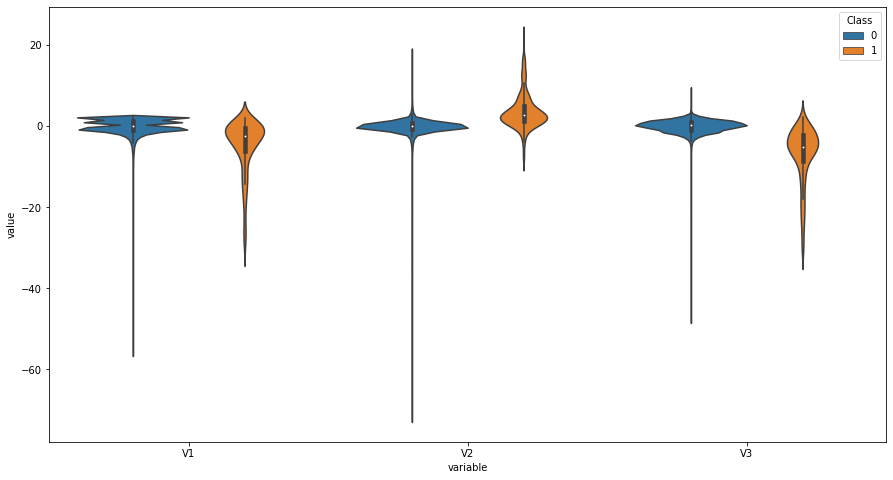

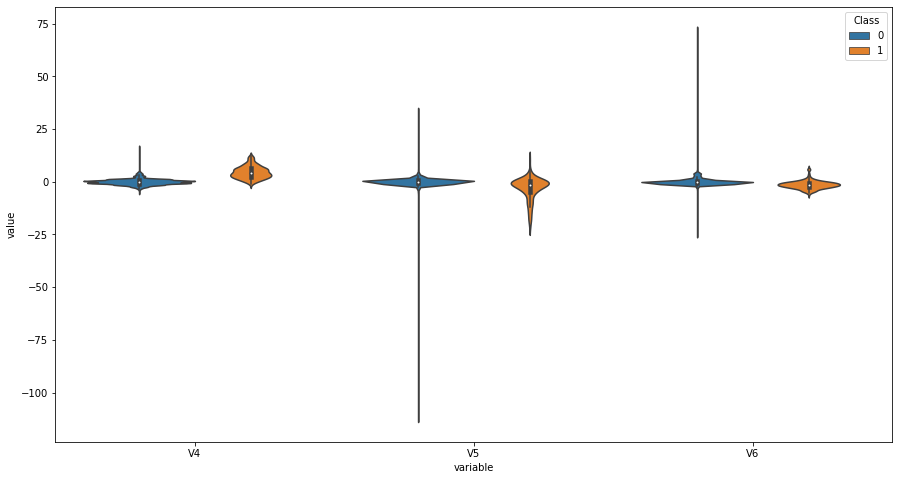

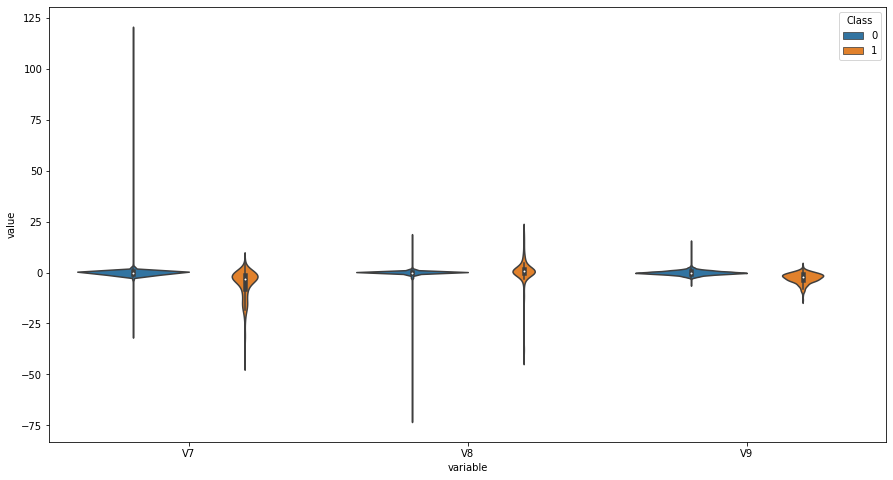

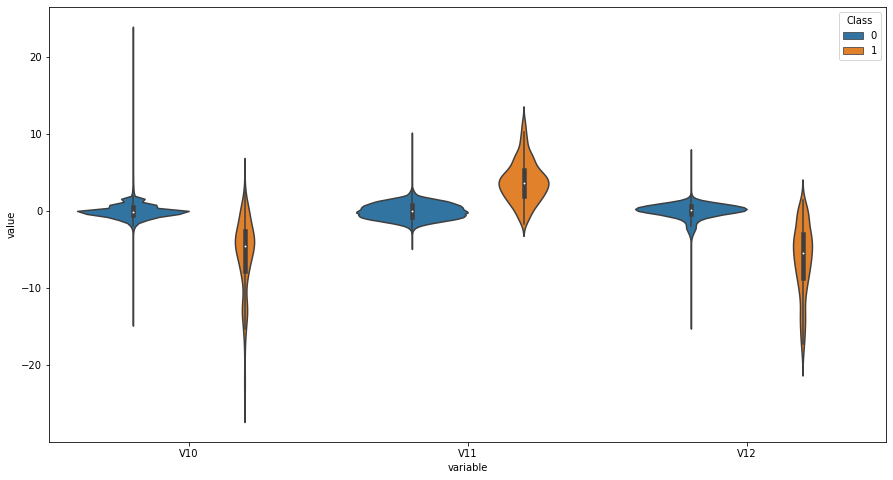

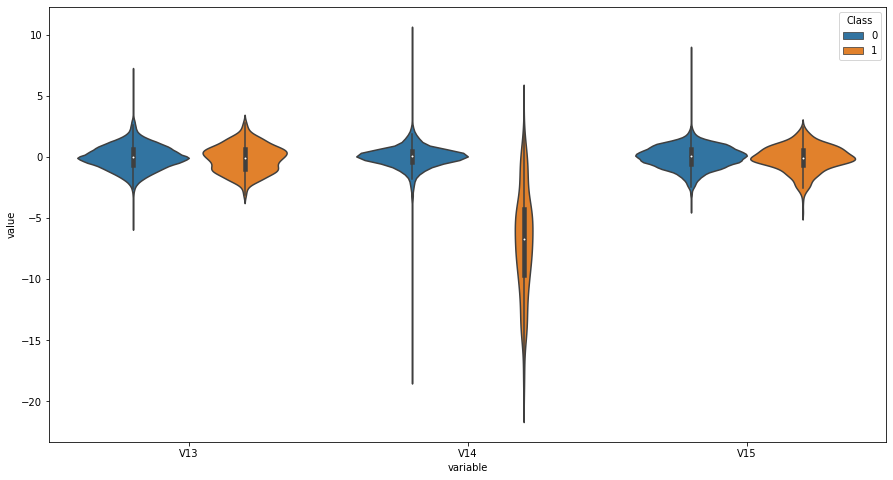

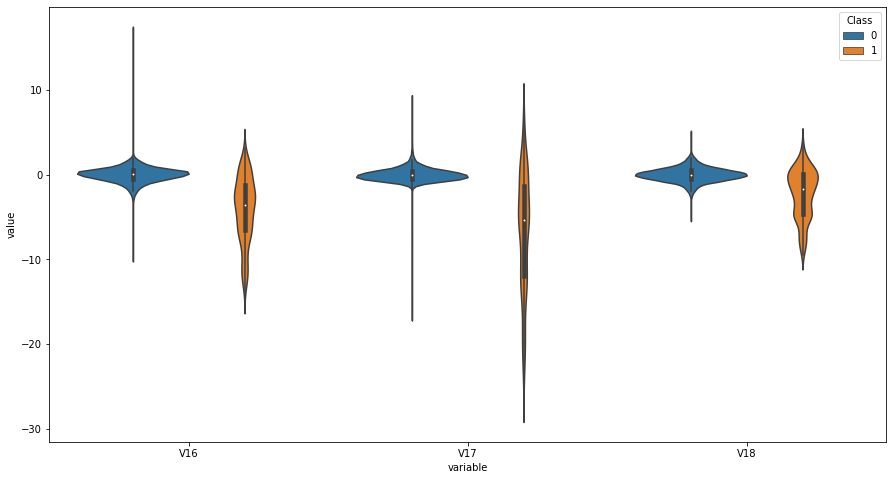

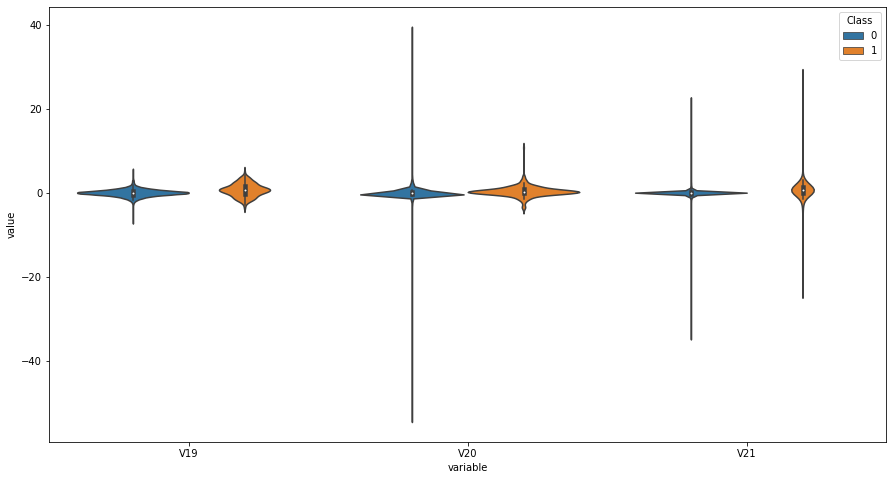

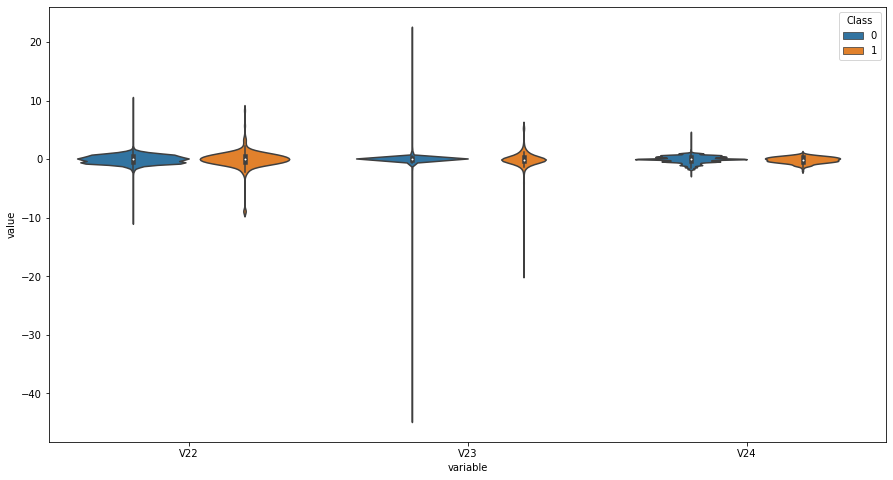

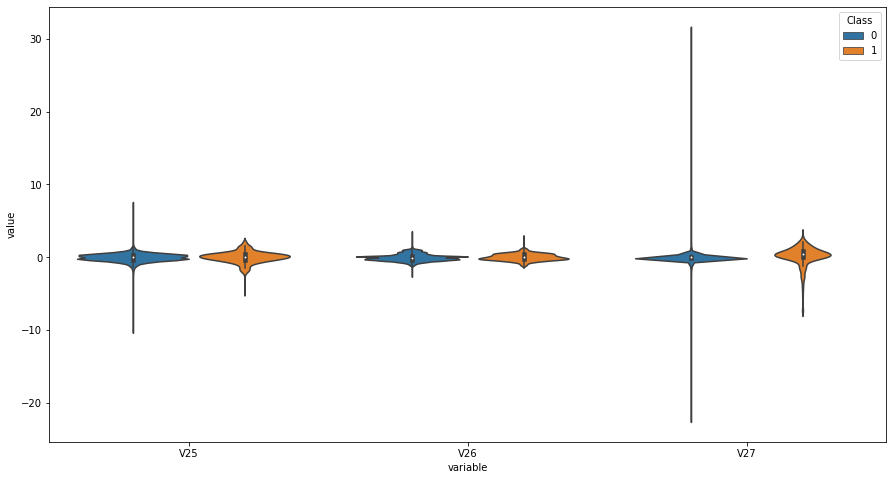

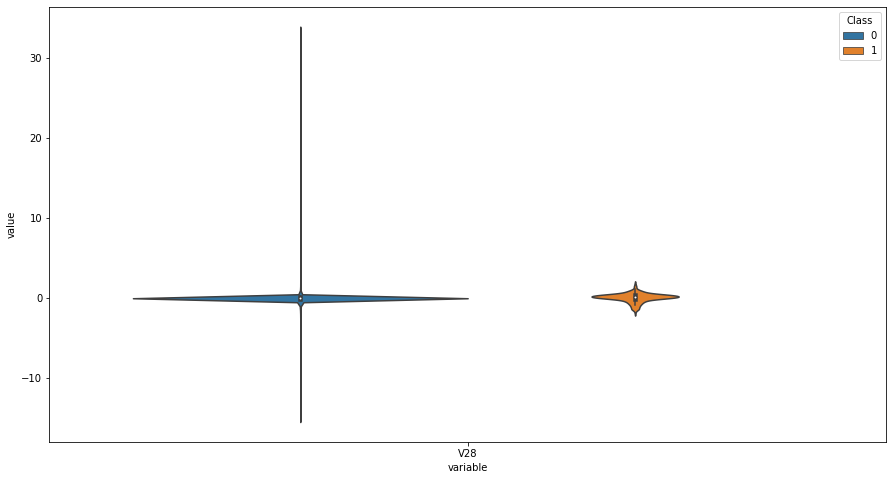

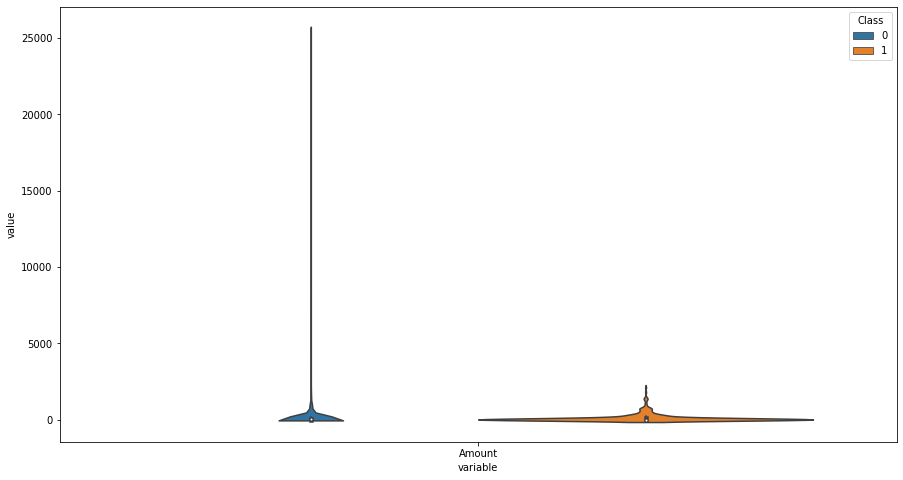

In [8]:
vizualize(df1, per_frame=3, show_split=False, quick=False)

    
    

### Interpretation
#### Split Violin Plot
In the above comparison for each value, where the plot is highly symetrical along the vertical axis, the data for both classes is similarly distributed; this implies there is little information in the value to assist in discriminating between the two classes.  In the opposite case, where the plot is highly asymetrical, good discriminitory information should be available.
This can be tested by running the analysis with and without the symetrical values and comparing the results.
#### Dual Violin Plot
Much of the same information is conveyed.  As above, when the plots are much the same shape, there is little to discriminate the classes.  Keeping the plot seperate also shows the difference in the mean between the classes, which helps to identify class differences. 

### Let's train our model as was done in the example and compare results

In [9]:
# Only use the 'Amount' and 'V1', ..., 'V28' features as in the example
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

define_train_predict(features, df1)



Features used in this analysis:
['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.88      0.61      0.72       246

    accuracy                           1.00    142404
   macro avg       0.94      0.80      0.86    142404
weighted avg       1.00      1.00      1.00    142404



These results match those in the article.

In the plot analysis, we suggested removing features with highly symetrical split violins.  Visual inspection provides these candidates for removal:
+ 13, 15, 22, 24, 26

In [10]:

features2 = [x for x in features if x not in ['V13','V15', 'V22', 'V24', 'V26']] #remove these 5 features from the prev. list
define_train_predict(features2, df1)

Features used in this analysis:
['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V23', 'V25', 'V27', 'V28']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.88      0.61      0.72       246

    accuracy                           1.00    142404
   macro avg       0.94      0.80      0.86    142404
weighted avg       1.00      1.00      1.00    142404



The results are identical! This appears to confirm our interpretation of the graph.  


Now let's turn that experiment upside down.  Looking at the dual Violin Plots, identify the pairs that have the largest difference between the means of the classes.  Let's use only these and see what happens.

In [11]:
features4 = [ 'V11', 'V12', 'V14', 'V16', 'V17' ]
define_train_predict(features4, df1)

Features used in this analysis:
['V11', 'V12', 'V14', 'V16', 'V17']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.87      0.56      0.68       246

    accuracy                           1.00    142404
   macro avg       0.93      0.78      0.84    142404
weighted avg       1.00      1.00      1.00    142404



This result, using only 5 features, is within 1% of the precision and 5% of the recall of the model using all the features.

It appears thatthe Violin Plot allows us to quickly identify which features of this data set have the most and least descriptive power.